# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ibrahim Mumtaz Samadikun
- **Email:** mumtazsamadikun765@gmail.com
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang memiliki value penjualan terbesar ?
- Darimana asal seller yang memiliki value penjualan terbesar ?
- Jenis pembayaran apa yang sering digunakan customer ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
customer = pd.read_csv('/content/customers_dataset.csv')
geolocation = pd.read_csv('/content/geolocation_dataset.csv')
order_items = pd.read_csv('/content/order_items_dataset.csv')
order_payments = pd.read_csv('/content/order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/order_reviews_dataset.csv')
orders = pd.read_csv('/content/orders_dataset.csv')
products = pd.read_csv('/content/products_dataset.csv')
products_category = pd.read_csv('/content/product_category_name_translation.csv')
sellers = pd.read_csv('/content/sellers_dataset.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#membuat tabel untuk menghitung kategori produk dengan value penjualan terbanyak value

df_value_products = pd.merge(
    left=order_items,
    right=order_payments,
    how='inner',
    left_on='order_id',
    right_on='order_id'
)
df_category_products = pd.merge(
    left=products,
    right=df_value_products,
    how='inner',
    left_on='product_id',
    right_on='product_id'
)
#tabel yang akan digunakan
df_category_products_eng = pd.merge(
    left=df_category_products,
    right=products_category,
    how='inner',
    left_on='product_category_name',
    right_on='product_category_name'
)

df_category_products_eng.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,1,debit_card,1,18.30,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,1,voucher,1,265.99,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,1,credit_card,1,87.62,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,1,credit_card,2,121.84,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,1,credit_card,4,46.19,housewares


In [ ]:
#membuat tabel untuk mengetahui state mana yang memiliki value penjualan terbesar
df_location = pd.merge(
    left=sellers,
    right=order_items,
    how='inner',
    left_on='seller_id',
    right_on='seller_id'
)
#tabel yang akan digunakan
df_location_value = pd.merge(
    left=df_location,
    right=order_payments,
    how='inner',
    left_on='order_id',
    right_on='order_id'
)
df_location_value.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56,1,credit_card,2,115.76
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92,1,credit_card,2,117.62
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42,1,credit_card,4,158.80
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09,1,boleto,1,135.08
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89,1,boleto,1,221.79


In [ ]:
#untuk pertanyaan ketiga tabel yang digunakan yaitu pada variabel order_payments
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- xxx
- xxx

### Assessing Data

In [ ]:
#melihat apakah terdapat nilai null pada tabel df_category_products_eng
df_category_products_eng.isnull().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,1
product_length_cm,1
product_height_cm,1
product_width_cm,1
order_id,0


In [ ]:
#melihat apakah ada nilai duplikat pada tabel df_category_products_eng
df_category_products_eng.duplicated().sum()

0

In [ ]:
#melihat apakah ada nilai null pada tabel df_location_value
df_location_value.isnull().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0
order_id,0
order_item_id,0
product_id,0
shipping_limit_date,0
price,0
freight_value,0


In [ ]:
#melihat apakah ada nilai duplikat pada tabel df_location_value
df_location_value.duplicated().sum()

0

In [ ]:
#melihat apakah ada nilai null pada tabel order_payments
order_payments.isnull().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [ ]:
#melihat apakah ada nilai duplikat pada tabel order_payments
order_payments.duplicated().sum()

0

**Insight:**
- xxx
- xxx

### Cleaning Data

In [ ]:
#karena nilai null hanya terdapat pada tabel df_category_products_eng, maka dilakukan operasi untuk menghapus nilai null seperti berikut
df_category_products_eng.dropna(axis=0, inplace=True)

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
#melihat rangkuman parameter statistik pada tabel df_category_products_eng
df_category_products_eng.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value
count,115877.000000,115877.000000,115877.000000,115877.000000,115877.000000,115877.000000,115877.000000,115877.000000,115877.000000,115877.000000,115877.000000,115877.000000,115877.000000
mean,48.766019,786.955755,2.207720,2117.594190,30.311554,16.656886,23.110445,1.196320,120.909070,20.075808,1.092831,2.945511,173.001216
std,10.035355,653.074676,1.719525,3785.744297,16.225837,13.480721,11.758209,0.699566,184.140924,15.870955,0.725316,2.779913,268.060699
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,39.900000,13.080000,1.000000,1.000000,61.010000
50%,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,74.900000,16.320000,1.000000,2.000000,108.200000
75%,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,134.900000,21.220000,1.000000,4.000000,189.720000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000


In [ ]:
#melihat kategori produk dengan jumlah value terbanyak
df_category_products_eng.groupby('product_category_name_english').agg({
    'payment_value': 'sum'
}).sort_values(by='payment_value',ascending=False)

,payment_value
product_category_name_english,
bed_bath_table,1712553.67
health_beauty,1657373.12
computers_accessories,1585330.45
furniture_decor,1430176.39
watches_gifts,1429216.68
...,...
flowers,2213.01
home_comfort_2,1710.54
cds_dvds_musicals,1199.43


**Insights :**
Dari tabel df_category_products_end, didapatkan kategori produk bed_bath_table memiliki total valuasi terbesar diantara kategori produk lainnya, diikuti health_beauty dan computer_accesories.

In [ ]:
#melihat rangkuman parameter statistik pada tabel df_location_value
df_location_value.describe()

,seller_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value
count,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000
mean,24441.423049,1.195900,120.824783,20.045990,1.093528,2.939482,172.686752
std,27572.632286,0.697706,184.479323,15.861315,0.726692,2.774223,267.592290
min,1001.000000,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000
25%,6429.000000,1.000000,39.900000,13.080000,1.000000,1.000000,60.870000
50%,13660.000000,1.000000,74.900000,16.290000,1.000000,2.000000,108.210000
75%,28035.000000,1.000000,134.900000,21.190000,1.000000,4.000000,189.260000
max,99730.000000,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000


In [ ]:
#melihat kota seller dengan jumlah value terbanyak
df_location_value.groupby('seller_state').agg({
    'payment_value': 'sum'
}).sort_values(by='payment_value',ascending=False)

,payment_value
seller_state,
SP,13369701.15
PR,1846047.66
MG,1564757.80
RJ,1097825.78
SC,886745.47
RS,560236.38
BA,367899.46
DF,137784.98
PE,124894.83


**Insight:**
Dari tabel df_location_value, didapatkan bahwa Kota Sao Paulo menjadi tempat seller yang memiliki valuasi terbesar diantara kota lainnya. Kota dengan valuasi terendah terdapat pada kota Macatuba.

In [ ]:
order_payments.groupby('payment_type').size().reset_index(name='count').sort_values(by='count', ascending=False)

,payment_type,count
1,credit_card,76795
0,boleto,19784
4,voucher,5775
2,debit_card,1529
3,not_defined,3


## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa yang memiliki value penjualan terbesar ?

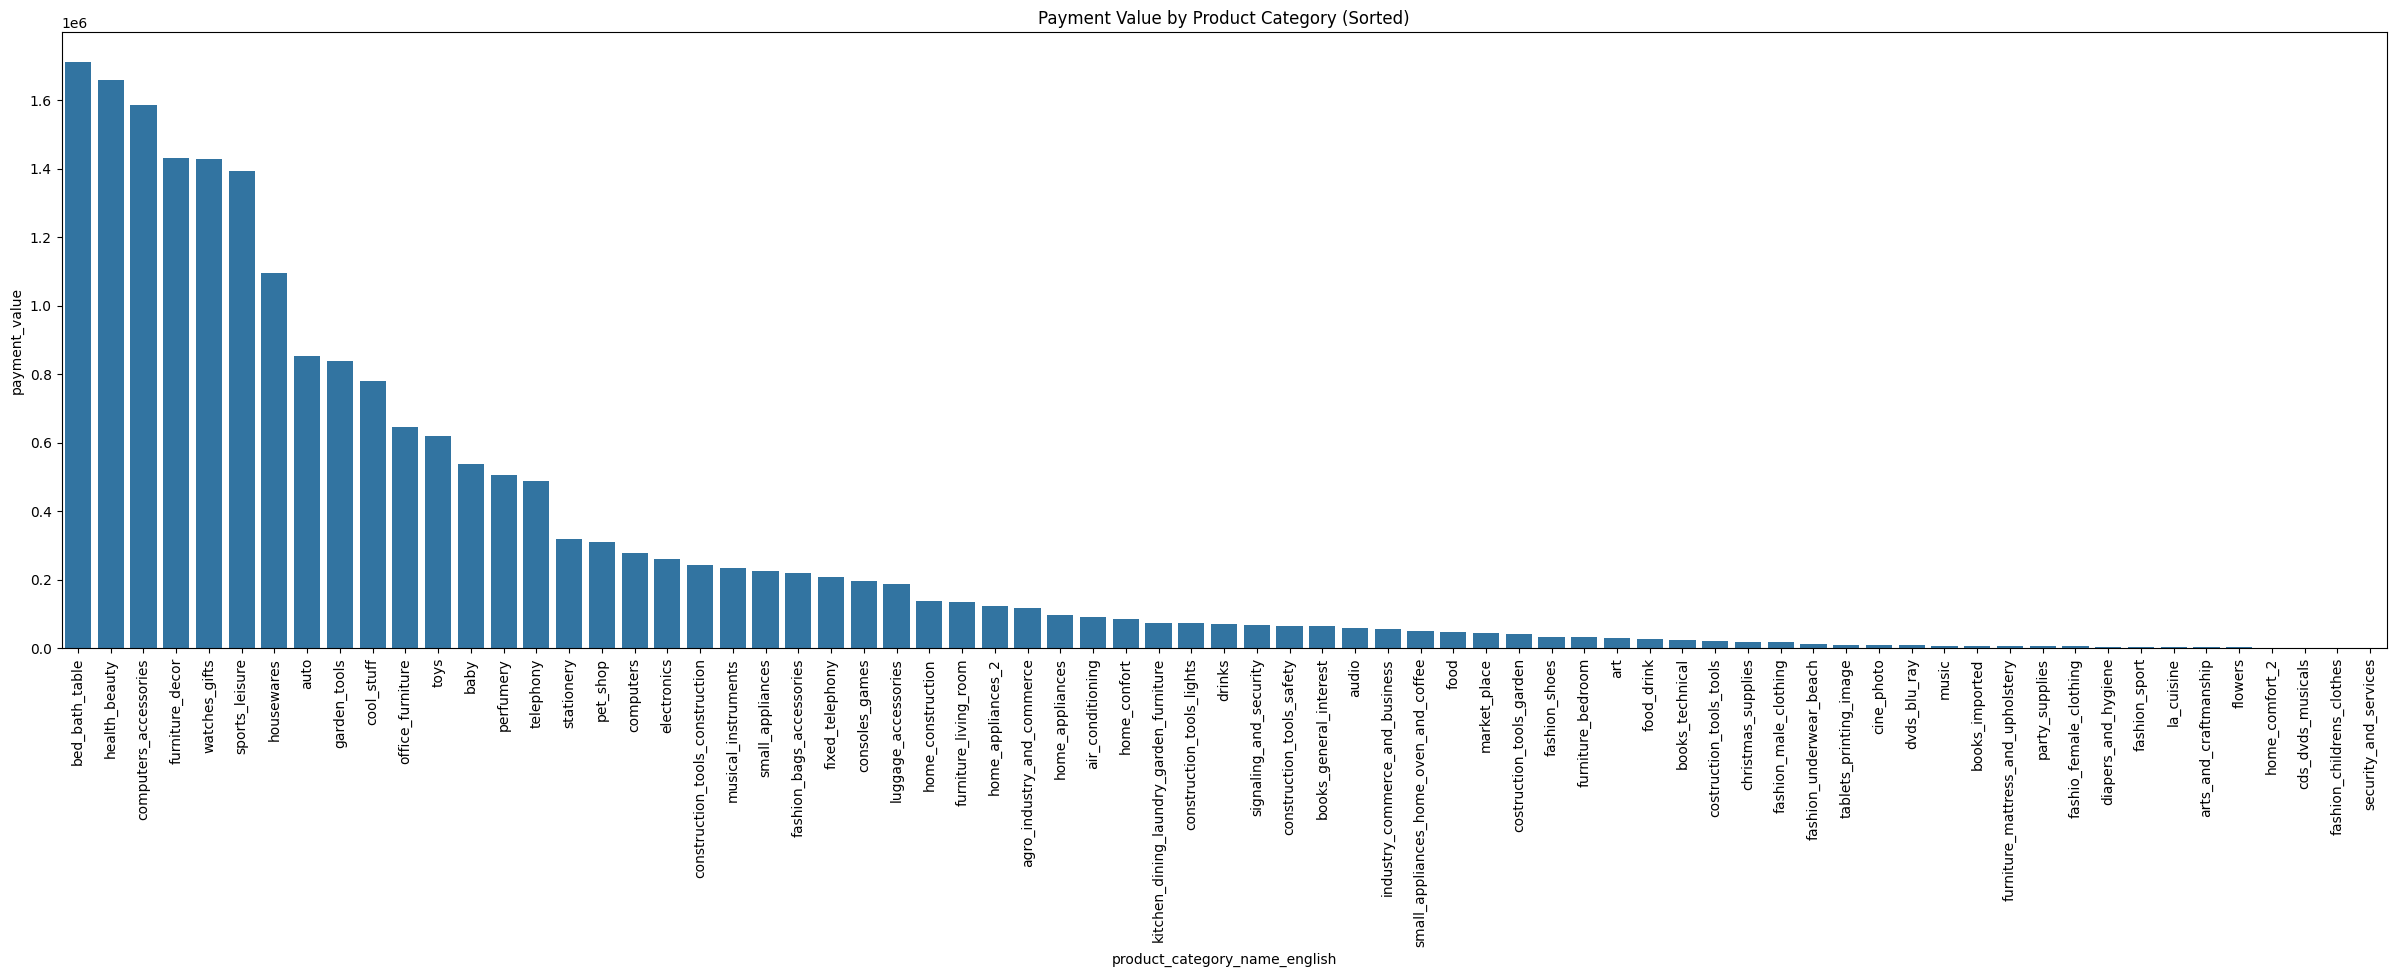

In [ ]:
top_payment_value = (
    df_category_products_eng.groupby('product_category_name_english')
    .agg({'payment_value': 'sum'})  # Menghitung total nilai
    .reset_index()  # Reset index untuk plotting
    .sort_values(by='payment_value', ascending=False)  # Urutkan dari terbesar
)


plt.figure(figsize=(30, 8))
sns.barplot(data=top_payment_value, x='product_category_name_english', y='payment_value')
plt.xticks(rotation=90)
plt.title("Payment Value by Product Category (Sorted)")
plt.show()


### Pertanyaan 2: Darimana asal seller yang memiliki value penjualan terbesar ?





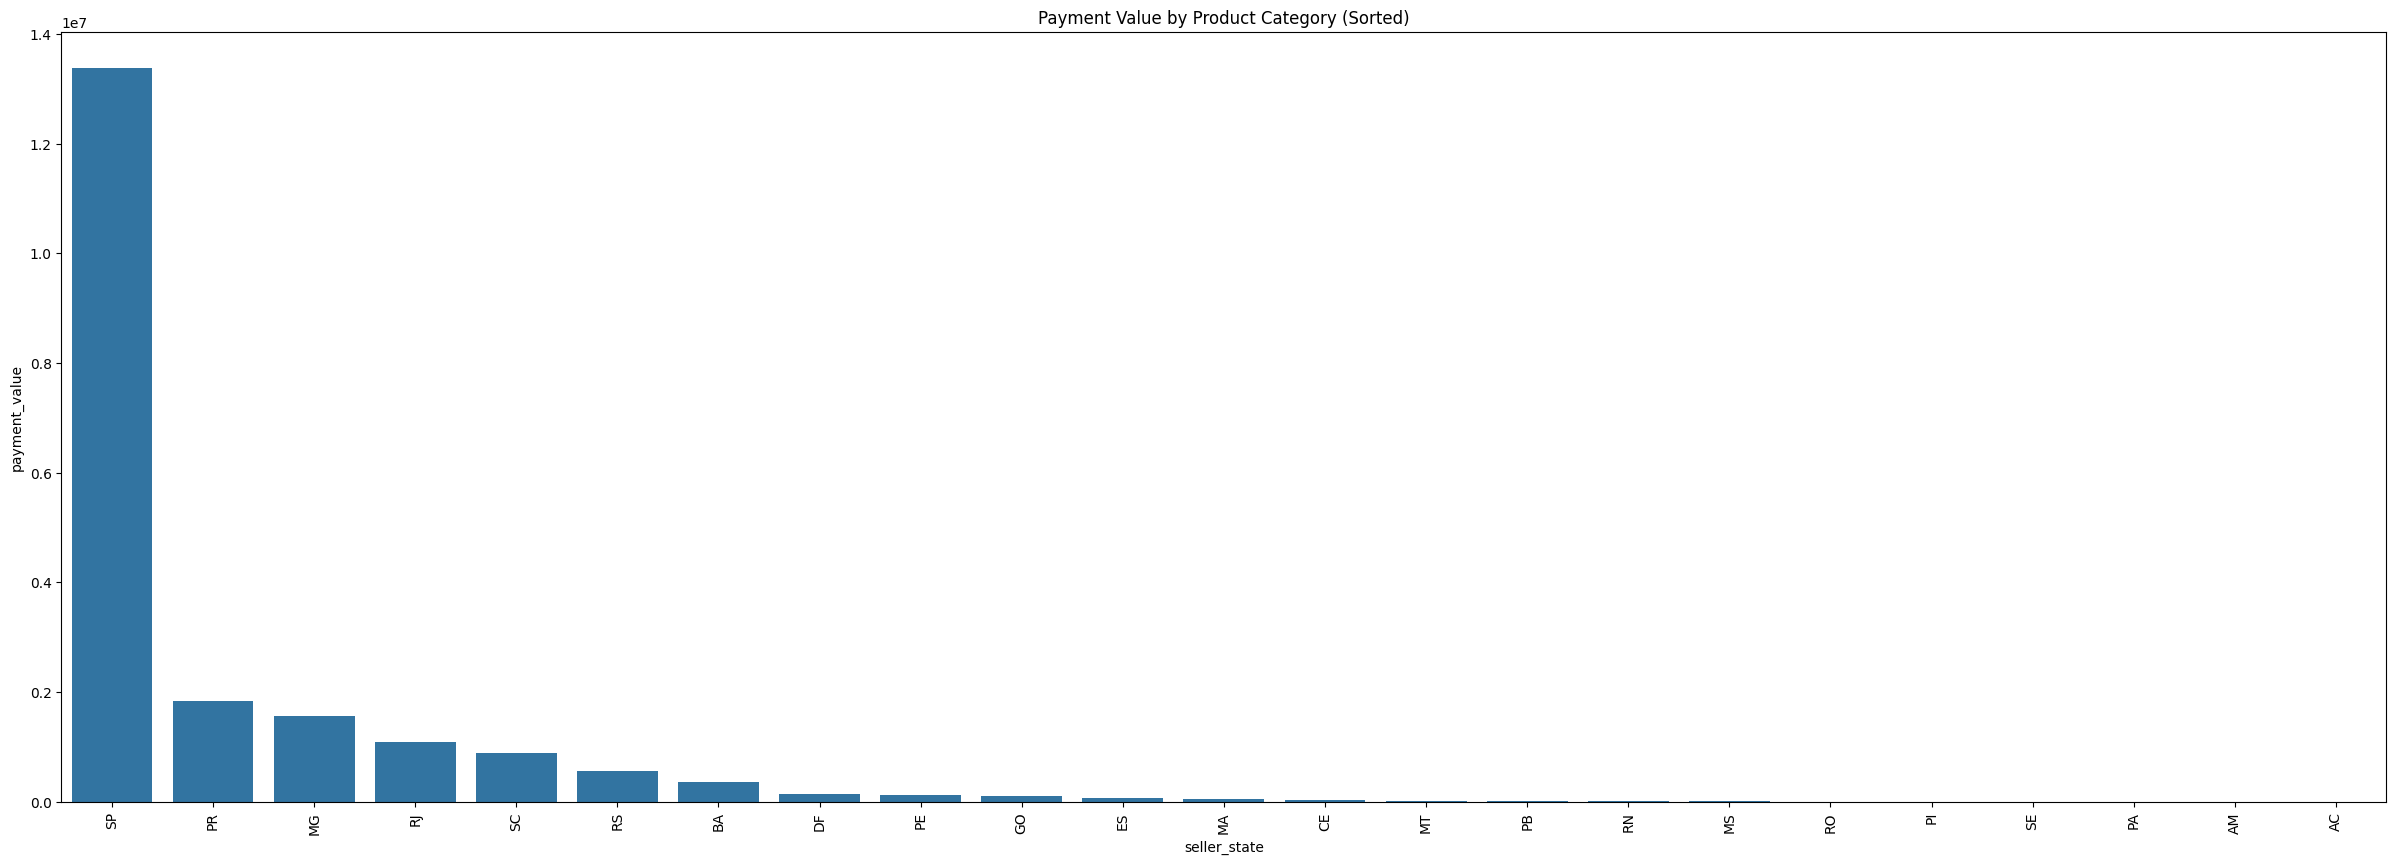

In [ ]:
top_payment_value_location = (
    df_location_value.groupby('seller_state')
    .agg({'payment_value': 'sum'})
    .reset_index()
    .sort_values(by='payment_value', ascending=False)
)


plt.figure(figsize=(30, 10))
sns.barplot(data=top_payment_value_location, x='seller_state', y='payment_value')
plt.xticks(rotation=90)
plt.title("Payment Value by Product Category (Sorted)")
plt.show()

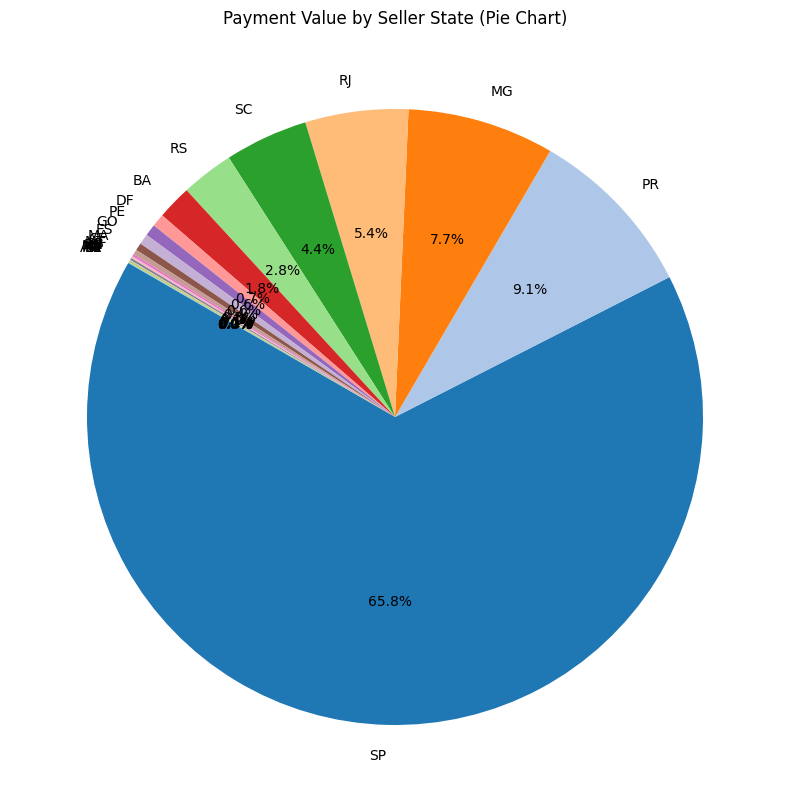

In [ ]:
#dalam bentuk pie chart
import matplotlib.pyplot as plt

# Membuat pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    top_payment_value_location['payment_value'],
    labels=top_payment_value_location['seller_state'],
    autopct='%1.1f%%',
    startangle=150,
    colors=plt.cm.tab20.colors
)
plt.title("Payment Value by Seller State (Pie Chart)")
plt.show()


### Pertanyaan 3: Jenis pembayaran apa yang sering digunakan customer ?





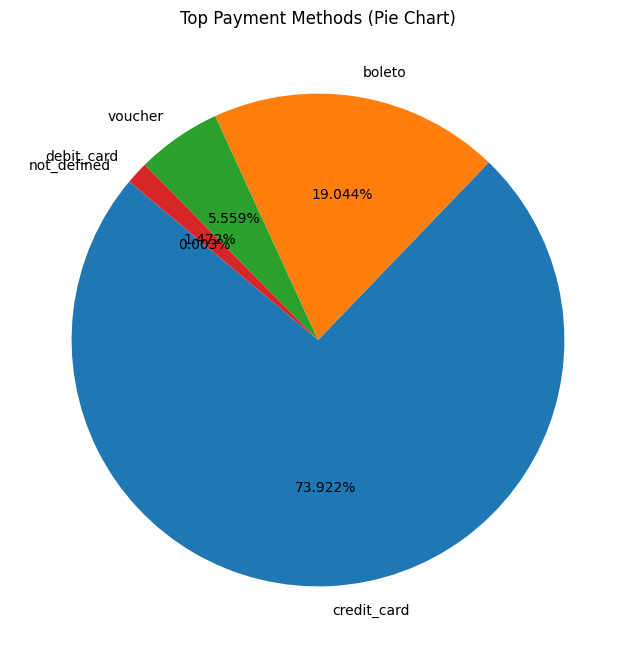

In [ ]:
top_payment_method = (
    order_payments.groupby('payment_type')
    .size()  # Menghitung jumlah transaksi
    .reset_index(name='count')  # Memberikan nama kolom baru untuk hasil agregasi
    .sort_values(by='count', ascending=False)  # Urutkan dari terbesar
)


plt.figure(figsize=(8, 8))
plt.pie(
    top_payment_method['count'],  # Nilai untuk pie chart
    labels=top_payment_method['payment_type'],  # Label untuk setiap bagian
    autopct='%1.3f%%',
    startangle=140
)
plt.title("Top Payment Methods (Pie Chart)")
plt.show()

**Insigths :**
- Kategori produk yang memiliki value penjualan terbesar adalah bed bath table, diikuti oleh health beauty dan computers accessories.
- Lokasi seller dengan value penjualan terbesar yaitu pada state SP (São Paulo), diikuti PR (Parana) dan MG (Minas Gerais).
- Jenis pembayaran yang banyak digunakan customer adalah credit card, diikuti dengan boleto dan voucher.

## Analisis Lanjutan (Opsional)

## Conclusion

- Kategori produk yang memiliki value penjualan terbesar adalah bed bath table, diikuti oleh health beauty dan computers accessories.
- Lokasi seller dengan value penjualan terbesar yaitu pada state SP (São Paulo), diikuti PR (Parana) dan MG (Minas Gerais).
- Jenis pembayaran yang banyak digunakan customer adalah credit card, diikuti dengan boleto dan voucher.